## Data Exploration (Week 2 Assignment)
In this notebook, I will import a dataset from LA Metro that shows the transit agency's Bus Rapid Transit (BRT) lines. Then, I'll use some basic functions from the geopandas library to explore the features of the dataset.

In [10]:
# importing the geopands library
import geopandas as gpd

In [11]:
# creating a new variable to store the LA Metro shapefile data
brt = gpd.read_file('data/RapidBRT1219.shp')

In [6]:
# what data type is the brt variable?
type(brt)

geopandas.geodataframe.GeoDataFrame

In [7]:
# what are the dimensions of the brt gdf? how many rows and columns?
brt.shape

(87, 5)

In [18]:
# I'm not sure why the .info function looks like this for the dataset - the .dtypes looks more useable to me in this instance
# It looks like the dataset shows each line segment for the given route, which includes turnarounds at the line terminus
brt.info

<bound method DataFrame.info of    VAR_ROUTE VAR_IDENT  VAR_DIREC                        VAR_DESCR  \
0        704        E1          2   END TO END - RAPID - TO DIV13O   
1        704        E3          2                 NEBSEP Shortline   
2        704        E6          2               TRIPS START SEPSAN   
3        704        W1          3  END TO END- RAPID - FROM DIV13O   
4        704        W3          3                 NEBSEP Shortline   
..       ...       ...        ...                              ...   
82       901        E2          2           CANOGA STATION LAYOVER   
83       901        W1          3                       END TO END   
84       901        W2          3           CANOGA STATION LAYOVER   
85       910        N1          0                       END TO END   
86       910        S1          1                             None   

                                             geometry  
0   LINESTRING (-118.49997 34.01574, -118.50054 34...  
1   LINESTRING 

In [19]:
brt.dtypes

VAR_ROUTE      object
VAR_IDENT      object
VAR_DIREC       int64
VAR_DESCR      object
geometry     geometry
dtype: object

In [18]:
# let's see what the first 15 rows look like
brt.head(15)

VAR_ROUTE VAR_IDENT  VAR_DIREC                        VAR_DESCR  \
0        704        E1          2   END TO END - RAPID - TO DIV13O   
1        704        E3          2                 NEBSEP Shortline   
2        704        E6          2               TRIPS START SEPSAN   
3        704        W1          3  END TO END- RAPID - FROM DIV13O   
4        704        W3          3                 NEBSEP Shortline   
5        704        E1          2   END TO END - RAPID - TO DIV13O   
6        705        N1          0                            RAPID   
7        705        NP          0                   before PULL-IN   
8        705        S1          1                            RAPID   
9        705        SP          1                   after PULL-OUT   
10       710        N1          0                       END TO END   
11       710        N3          0                           WILWET   
12       710        S1          1                       END TO END   
13       720        E1          2                       END TO END   
14       720        E3          2               FEDERAL BLDG. L.O.   

                                             geometry  
0   LINESTRING (-118.49997 34.01574, -118.50054 34...  
1   LINESTRING (-118.44327 34.04567, -118.44335 34...  
2   LINESTRING (-118.44356 34.04791, -118.44354 34...  
3   LINESTRING (-118.23190 34.05663, -118.23230 34...  
4   LINESTRING (-118.38430 34.08485, -118.38471 34...  
5   LINESTRING (-118.23190 34.05663, -118.23230 34...  
6   LINESTRING (-118.22745 34.00463, -118.22754 34...  
7   LINESTRING (-118.37612 34.06248, -118.37612 34...  
8   LINESTRING (-118.38374 34.08426, -118.38375 34...  
9   LINESTRING (-118.38373 34.08501, -118.38325 34...  
10  LINESTRING (-118.35698 33.87176, -118.35696 33...  
11  LINESTRING (-118.31864 34.06172, -118.31862 34...  
12  LINESTRING (-118.30844 34.06309, -118.30784 34...  
13  LINESTRING (-118.49027 34.01384, -118.49043 34...  
14  LINESTRING (-118.44719 34.05707, -118.44699 34...

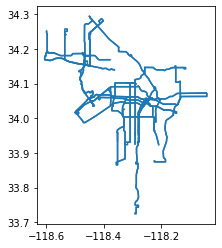

In [10]:
# to see what this data looks like with its coordinates
brt.plot()

In [12]:
# how many rows of data exist for each bus route ('VAR_ROUTE')?
brt['VAR_ROUTE'].value_counts()

720    10
745     7
704     6
728     5
744     5
762     4
780     4
734     4
901     4
733     4
754     4
760     4
705     4
740     3
750     3
770     3
710     3
751     2
757     2
910     2
794     2
788     2
Name: VAR_ROUTE, dtype: int64

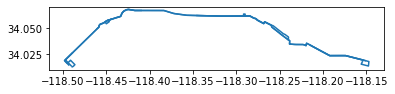

In [14]:
# I want to isolate the 720 line (one of several bus routes that serve the UCLA campus area!)
# To do this, I create a variable called line_720 and use .loc to save only the rows whose VAR_ROUTE value is 720
# To check my work, I plot the 720 line dataset, and it worked! The 720 runs east-west, mostly along the Wilshire corridor
line_720 = brt.loc[brt['VAR_ROUTE'] == '720']
line_720.plot()

In [20]:
# I want to zoom in on the 720 route info to get a better idea of what I'm working with
line_720.info

<bound method DataFrame.info of    VAR_ROUTE VAR_IDENT  VAR_DIREC                   VAR_DESCR  \
13       720        E1          2                  END TO END   
14       720        E3          2          FEDERAL BLDG. L.O.   
15       720        E4          2            6TH/CENTRAL L.O.   
16       720        E5          2                   WILVER LO   
17       720        E7          2          WHITTIER / HOEFNER   
18       720        EB          2         WILSHIRE_BARRINGTON   
19       720        W1          3                  END TO END   
20       720        W2          3  3RD ST PROMENADE P/I & DHD   
21       720        W3          3          FEDERAL BLDG. L.O.   
22       720        W5          3                VERMONT L.O.   

                                             geometry  
13  LINESTRING (-118.49027 34.01384, -118.49043 34...  
14  LINESTRING (-118.44719 34.05707, -118.44699 34...  
15  LINESTRING (-118.29140 34.06181, -118.29030 34...  
16  LINESTRING (-118.34633 3

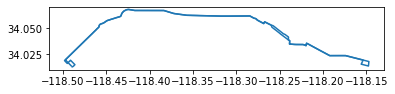

In [34]:
# testing out isolating an 'End to End' row to see how/if it differs from other rows for the 720 line
line_720_test = line_720.query("VAR_IDENT == 'W1' | VAR_DESCR == 'END TO END'")
line_720_test.plot()